In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import joblib

In [2]:
def load_data(data_dir):
    categories = ['apples', 'tomatoes']
    data = []
    labels = []

    for category in categories:
        category_path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img)
                img = Image.open(img_path).convert('RGB') 
                img = img.resize((150, 150)) 
                img_array = np.array(img).flatten()
                data.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(data), np.array(labels)

In [3]:
train_dir = 'C:\\Users\\Huynh Han Dong\\Documents\\AI crew\\Project AI 2\\ImageClassification\\dataset\\train'
test_dir = 'C:\\Users\\Huynh Han Dong\\Documents\\AI crew\\Project AI 2\\ImageClassification\\dataset\\test'
train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

In [4]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

pca = PCA(n_components=100)
train_data = pca.fit_transform(train_data)
test_data = pca.transform(test_data)

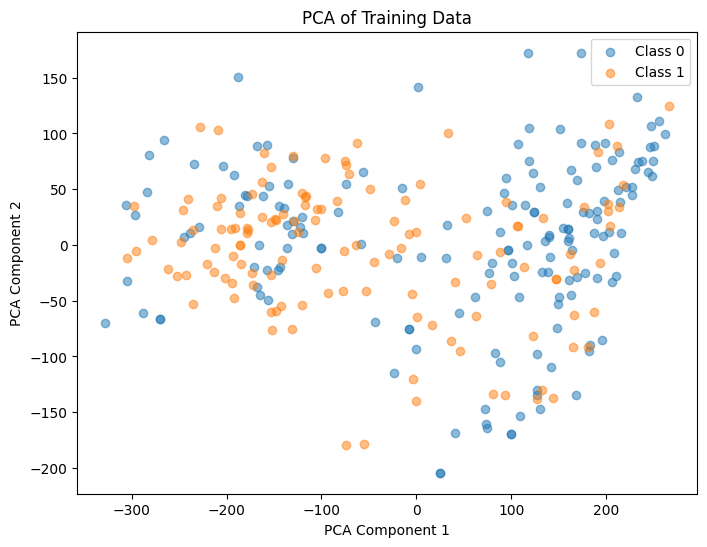

In [5]:
def plot_pca_scatter(data, labels, title, model=None):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        indices = labels == label
        plt.scatter(data[indices, 0], data[indices, 1], label=f'Class {label}', alpha=0.5)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

plot_pca_scatter(train_data, train_labels, 'PCA of Training Data')

In [6]:
dt_model = DecisionTreeClassifier(random_state=5)
dt_model.fit(train_data, train_labels)
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(train_data, train_labels)
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(train_data, train_labels)

SVC(kernel='linear', probability=True)

In [14]:
km_model = KMeans(n_clusters=2, random_state=0)
km_model.fit(train_data, train_labels)
gm_model = GaussianMixture(n_components=2, random_state=0)
gm_model.fit(train_data, train_labels)

GaussianMixture(n_components=2, random_state=0)

In [7]:
dt_predict = dt_model.predict(test_data)
svm_predict = svm_model.predict(test_data)
knn_predict = knn_model.predict(test_data)
dt_accuracy = accuracy_score(test_labels, dt_predict)
svm_accuracy = accuracy_score(test_labels, svm_predict)
knn_accuracy = accuracy_score(test_labels, knn_predict)
print(f'Test Accuracy Decision Tree: {dt_accuracy:.2f}')
print(f'Test Accuracy Support Vector Classification: {svm_accuracy:.2f}')
print(f'Test Accuracy K-Nearest Neighbors: {knn_accuracy:.2f}')

Test Accuracy Decision Tree: 0.64
Test Accuracy Support Vector Classification: 0.59
Test Accuracy K-Nearest Neighbors: 0.72


In [16]:
km_predict = km_model.predict(test_data)
gm_predict = gm_model.predict(test_data)
km_accuracy = accuracy_score(test_labels, km_predict)
gm_accuracy = accuracy_score(test_labels, gm_predict)
print(f'Test Accuracy K-means: {km_accuracy:.2f}')
print(f'Test Accuracy Gaussion Mixture : {gm_accuracy:.2f}')

Test Accuracy K-means: 0.67
Test Accuracy Gaussion Mixture : 0.67


In [ ]:
joblib.dump(dt_model, 'trained_models\\apple_tomato_classifier_dt.pkl')
joblib.dump(svm_model, 'trained_models\\apple_tomato_classifier_svm.pkl')
joblib.dump(knn_model, 'trained_models\\apple_tomato_classifier_knn.pkl')
joblib.dump(km_model, 'trained_models\\apple_tomato_classifier_km.pkl')
joblib.dump(gm_model, 'trained_models\\apple_tomato_classifier_gm.pkl')
joblib.dump(scaler, 'trained_models\\scaler.pkl')
joblib.dump(pca, 'trained_models\\pca.pkl')

['scaler.pkl']

In [8]:
def preprocess_image(img_path):
    try:
        img = Image.open(img_path).convert('RGB')
        img = img.resize((150, 150))
        img_array = np.array(img).flatten()
        img_array = scaler.transform([img_array])
        img_array = pca.transform(img_array)
        return img_array
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")
        return None

In [14]:
def classify_fruit(img_path, model):
    img_array = preprocess_image(img_path)
    if img_array is not None:
        prediction = model.predict(img_array)
        return prediction[0]
    else:
        return None

img_path = 'C:\\Users\\Huynh Han Dong\\Documents\\AI crew\\Project AI 2\\ImageClassification\\dataset\\apple.jpg'

model = joblib.load('C:\\Users\\Huynh Han Dong\\Documents\\AI crew\\Project AI 2\\ImageClassification\\apple_tomato_classifier_knn.pkl')

fruit_class = classify_fruit(img_path, model)
if fruit_class is not None:
    if fruit_class == 0:
        print("The image is classified as an Apple.")
    elif fruit_class == 1:
        print("The image is classified as a Tomato.")
else:
    print("Failed to classify the image.")

The image is classified as an Apple.
